**Creating CSV files**

In [104]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model


**Mount the Google Drive**

In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Preprocess the Data: Load the images, resize them, and create labels.**

In [106]:
image_paths = []
labels = []

**Load the Dataset and Class Labels**

In [107]:
# Directory containing the uploaded images
image_dir = '/content/drive/My Drive/Deep_Learning/Data'

# Initialize lists to store image file paths and corresponding labels
image_paths = []
labels = []

for filename in os.listdir(image_dir):
    if filename.startswith("R") or filename.startswith("P"):
        image_paths.append(os.path.join(image_dir, filename))
        # Create labels based on the filenames (0 for R, 1 for P)
        if filename.startswith("R"):
            labels.append(0)
        elif filename.startswith("P"):
            labels.append(1)

# Create a DataFrame to store image paths and labels
df = pd.DataFrame({'Image_Path': image_paths, 'Label': labels})

# Define the paths for the CSV files
train_csv_path = '/content/drive/My Drive/Deep_Learning/train.csv'
test_csv_path = '/content/drive/My Drive/Deep_Learning/test.csv'

# Split the DataFrame into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Save the training and testing DataFrames as CSV files
train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

print(f"CSV files saved:\n- Training CSV: {train_csv_path}\n- Testing CSV: {test_csv_path}")


CSV files saved:
- Training CSV: /content/drive/My Drive/Deep_Learning/train.csv
- Testing CSV: /content/drive/My Drive/Deep_Learning/test.csv


In [108]:
os.chdir("/content/drive/My Drive/Deep_Learning/")
os.getcwd()

'/content/drive/My Drive/Deep_Learning'

**Develop the CNN Algorithm**

In [109]:
# Define image size
image_height, image_width = 80, 80

# Define the paths for the CSV files (change these paths as needed)
train_csv_path = '/content/drive/My Drive/Deep_Learning/train.csv'
test_csv_path = '/content/drive/My Drive/Deep_Learning/test.csv'

# Load the CSV files
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

In [110]:
# Load and preprocess the images
def preprocess_images(image_paths, target_size=(image_height, image_width)):
    images = []
    for image_path in image_paths:
        img = load_img(image_path, target_size=target_size)
        img = img_to_array(img) / 255.0
        images.append(img)
    return np.array(images)


In [126]:
X_train = preprocess_images(train_df['Image_Path'])
X_test = preprocess_images(test_df['Image_Path'])

# Convert labels to binary format (0 or 1)
Y_train = train_df['Label'].values
Y_test = test_df['Label'].values

In [128]:
X_train = X_train.reshape(len(X_train), 80, 80, 3)
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test), 80, 80, 3)
Y_test = Y_test.reshape(len(Y_test), 1)
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)


Shape of X_train:  (80, 80, 80, 3)
Shape of Y_train:  (80, 1)
Shape of X_test:  (20, 80, 80, 3)
Shape of Y_test:  (20, 1)


In [171]:

# Create a CNN model for binary classification
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_height, image_width, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification



In [172]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [173]:
model.fit(X_train, Y_train, epochs = 40, batch_size = 64)

Epoch 1/40
2/2 [==============================] - 2s 178ms/step - loss: 0.5778 - accuracy: 0.6500
Epoch 2/40
2/2 [==============================] - 1s 178ms/step - loss: 9.5400e-04 - accuracy: 1.0000
Epoch 3/40
2/2 [==============================] - 1s 189ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 4/40
2/2 [==============================] - 1s 175ms/step - loss: 2.0058e-04 - accuracy: 1.0000
Epoch 5/40
2/2 [==============================] - 0s 107ms/step - loss: 9.5001e-06 - accuracy: 1.0000
Epoch 6/40
2/2 [==============================] - 0s 118ms/step - loss: 6.5851e-07 - accuracy: 1.0000
Epoch 7/40
2/2 [==============================] - 0s 135ms/step - loss: 1.2347e-07 - accuracy: 1.0000
Epoch 8/40
2/2 [==============================] - 0s 106ms/step - loss: 2.9630e-08 - accuracy: 1.0000
Epoch 9/40
2/2 [==============================] - 0s 111ms/step - loss: 9.0469e-09 - accuracy: 1.0000
Epoch 10/40
2/2 [==============================] - 0s 108ms/step - loss: 3.3023e-09 - accu

In [174]:
# Evaluate the model on the test data
accuracy = model.evaluate(X_test, Y_test)[1]
print(f"Test accuracy: {accuracy}")

1/1 [==============================] - 0s 171ms/step - loss: 4.2474e-18 - accuracy: 1.0000
Test accuracy: 1.0


In [175]:
# Save the trained model
model.save('/content/drive/My Drive/Deep_Learning/trained_model.h5')

**Test Images**

In [176]:
# Load the trained model
model = load_model('/content/drive/My Drive/Deep_Learning/trained_model.h5')

In [177]:
# Use the model to predict labels for the test images
predicted_labels = model.predict(X_test)
predicted_labels = np.argmax(predicted_labels, axis=1)  # Convert softmax outputs to class labels

1/1 [==============================] - 0s 87ms/step


In [178]:
# Create a DataFrame to store the image paths and predicted labels
output_df = pd.DataFrame({'Image_Path': test_df['Image_Path'], 'Predicted_Label': predicted_labels})

In [179]:
# Save the output DataFrame as a CSV file (you can change the output path)
output_csv_path = '/content/drive/My Drive/Deep_Learning/predicted_labels.csv'
output_df.to_csv(output_csv_path, index=False)

print(f"Predicted labels saved to: {output_csv_path}")


Predicted labels saved to: /content/drive/My Drive/Deep_Learning/predicted_labels.csv


**Cheking original images**

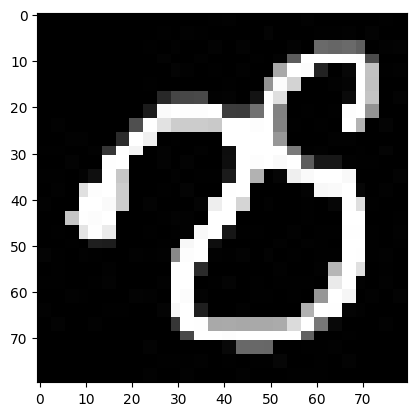

In [180]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

**Model evaluation**

In [181]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 170ms/step - loss: 4.2474e-18 - accuracy: 1.0000


[4.247373094932172e-18, 1.0]

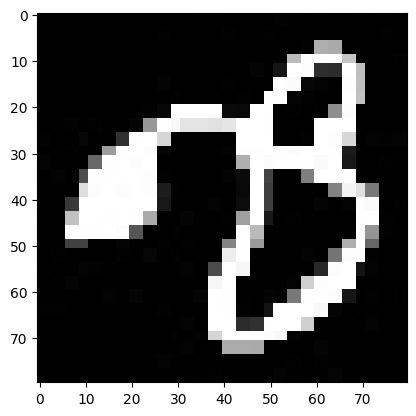

1/1 [==============================] - 0s 27ms/step
Our model says it is: ප
1/1 [==============================] - 0s 50ms/step - loss: 4.2474e-18 - accuracy: 1.0000
Test accuracy: 1.0


In [182]:
# Choose a random index from the test set
idx2 = random.randint(0, len(Y_test))

# Display the image
plt.imshow(X_test[idx2, :])
plt.show()

# Predict using the model for the selected image
y_pred = model.predict(X_test[idx2, :].reshape(1, 80, 80, 3))

# Check the prediction and print the result
if np.all(y_pred < 0.5):
    pred = 'ර'
else:
    pred = 'ප'

print("Our model says it is:", pred)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, Y_test)

# Print the test accuracy
print(f"Test accuracy: {accuracy}")

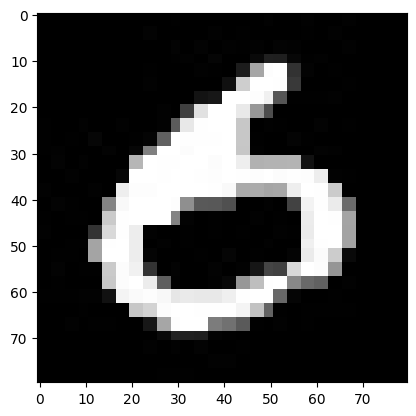

1/1 [==============================] - 0s 25ms/step
Our model says it is: ර
1/1 [==============================] - 0s 47ms/step - loss: 4.2474e-18 - accuracy: 1.0000
Test accuracy: 1.0


In [183]:
# Choose a random index from the test set
idx2 = random.randint(0, len(Y_test))

# Display the image
plt.imshow(X_test[idx2, :])
plt.show()

# Predict using the model for the selected image
y_pred = model.predict(X_test[idx2, :].reshape(1, 80, 80, 3))

# Check the prediction and print the result
if np.all(y_pred < 0.5):
    pred = 'ර'
else:
    pred = 'ප'

print("Our model says it is:", pred)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, Y_test)

# Print the test accuracy
print(f"Test accuracy: {accuracy}")